In [1]:
import pandas as pd
import numpy as np
import nltk

In [2]:
# Carregando o dataset já com os dados de engajamento
df_twitter = pd.read_excel("tbl_twitter_v2.xlsx")

In [3]:
df_twitter.head(5)

,User,Date,Likes,Retweets,Quotes,Replies,Total_Engajamento,Tweet,text_sem_stopwords,tokenized,text_string,Qtd_Caracteres,Politica,Saude,Educacao,Seguranca,Meio Ambiente,Economia,Categoria_Predominante
0,fatooufake,202208,4,0,0,2,8,"candidato à reeleição pelo pl participou, nest...","candidato reeleicao pl participou, nesta quart...","['candidato', 'reeleicao', 'pl', 'participou',...",candidato reeleicao participou nesta quarta-fe...,141,4,0,0,0,0,0,POLITICA
1,fatooufake,202208,7,0,0,1,9,candidato do psdb ao governo do df participou ...,candidato psdb governo df participou serie ent...,"['candidato', 'psdb', 'governo', 'df', 'partic...",candidato psdb governo participou serie entrev...,124,3,0,0,0,0,0,POLITICA
2,fatooufake,202208,7,1,0,1,10,a entrevista foi transmitida ao vivo pela rádi...,entrevista transmitida vivo radio sites redes ...,"['entrevista', 'transmitida', 'vivo', 'radio',...",entrevista transmitida vivo radio sites redes ...,108,1,0,0,0,0,0,POLITICA
3,fatooufake,202208,7,0,0,1,9,"frases foram ditas em redes sociais, no horári...","frases ditas redes sociais, horario eleitoral ...","['frases', 'ditas', 'redes', 'sociais', ',', '...",frases ditas redes sociais horario eleitoral e...,112,2,0,0,0,0,0,POLITICA
4,fatooufake,202208,6,1,0,1,9,candidato ao governo do rio pelo pdt participo...,"candidato governo rio pdt participou, nesta se...","['candidato', 'governo', 'rio', 'pdt', 'partic...",candidato governo rio pdt participou nesta seg...,148,3,0,0,0,0,0,POLITICA


In [4]:
# Análise I: agrupado por mês/ano, contando o total de tweets, em cada um dos painéis de checagem
pd.set_option("display.max_rows", 100) # aumentando a quantidade de linhas para exibição

df_twitter.groupby(by= ['User', 'Date'])['User'].count()

User             Date  
agencialupa      202107    179
                 202108    233
                 202109    245
                 202110    219
                 202111    286
                 202112    239
                 202201    275
                 202202    266
                 202203    297
                 202204    179
                 202205    125
                 202206    157
                 202207    172
                 202208    330
estadaoverifica  202105     53
                 202106     65
                 202107     72
                 202108     52
                 202109     50
                 202110     47
                 202111     52
                 202112     46
                 202201     43
                 202202     60
                 202203     61
                 202204     81
                 202205     89
                 202206     64
                 202207     59
                 202208     68
fatooufake       202005     65
               

<AxesSubplot:xlabel='Date'>

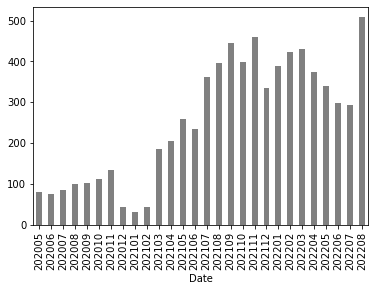

In [5]:
# O volume no tempo
df_twitter.groupby(by= 'Date')['User'].count().plot.bar(color=['grey']) # ajustar a ordenação

In [6]:
# Análise II: observando o total de observações, em cada um dos painéis de checagem
df_twitter.groupby(by= 'User')['User'].count()

User
agencialupa        3202
estadaoverifica     962
fatooufake         1039
uolconfere         1938
Name: User, dtype: int64

In [7]:
# Análise III: observando o total de observações, em política
df_twitter.groupby(by= 'Categoria_Predominante')['User'].count().sort_values(ascending=False).head(12)

Categoria_Predominante
POLITICA         2854
NEUTRO           1965
SAUDE            1804
SEGURANCA         285
ECONOMIA           97
EDUCACAO           76
MEIO_AMBIENTE      60
Name: User, dtype: int64

<AxesSubplot:xlabel='Categoria_Predominante'>

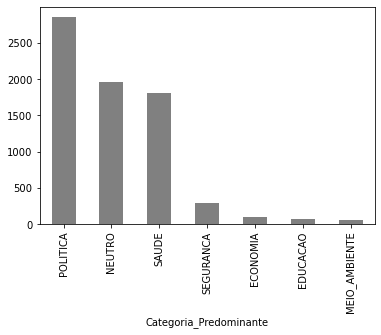

In [8]:
# O volume no tempo
df_twitter.groupby(by= ['Categoria_Predominante'])['User'].count().sort_values(ascending=False).head(12).plot.bar(color=['grey'])

In [9]:
# Análise IV: total de engajamento, por categoria
df_twitter.groupby(by= 'Categoria_Predominante')['Total_Engajamento'].sum().sort_values(ascending=False)

Categoria_Predominante
POLITICA         241152
SAUDE            176155
NEUTRO           105351
SEGURANCA         26226
ECONOMIA          22746
MEIO_AMBIENTE      6625
EDUCACAO           2049
Name: Total_Engajamento, dtype: int64

In [10]:
# Análise IV: análise descritiva das categóricas
df_twitter.describe()

,Date,Likes,Retweets,Quotes,Replies,Total_Engajamento,Qtd_Caracteres,Politica,Saude,Educacao,Seguranca,Meio Ambiente,Economia
count,7141.000000,7141.000000,7141.000000,7141.000000,7141.000000,7141.000000,7141.000000,7141.000000,7141.000000,7141.000000,7141.000000,7141.000000,7141.000000
mean,202139.122812,45.190870,10.426131,3.271951,7.915418,81.263689,148.051954,0.958969,0.584792,0.022966,0.100126,0.013303,0.027167
std,63.477945,167.156473,48.830801,35.965603,69.652238,365.422311,52.103199,1.367232,1.121593,0.171594,0.361178,0.136860,0.203171
min,202005.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,202107.000000,4.000000,0.000000,0.000000,1.000000,6.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,202111.000000,11.000000,2.000000,0.000000,1.000000,16.000000,142.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,202204.000000,34.000000,8.000000,1.000000,3.000000,53.000000,194.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,202208.000000,6349.000000,1849.000000,2176.000000,4419.000000,12817.000000,335.000000,10.000000,8.000000,3.000000,7.000000,3.000000,4.000000


In [11]:
# Análise V: análise dos percentis, dentro das Categorias Predominantes
df_analysis = df_twitter.groupby('Categoria_Predominante')['Likes', 'Retweets', 'Quotes', 'Replies', 'Total_Engajamento', 'Qtd_Caracteres'].describe()
df_analysis.to_excel("Resultado_Analise_Descritiva_Categoria_Predominante.xlsx")

C:\Users\clara\AppData\Local\Temp\ipykernel_42828\1148948248.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_analysis = df_twitter.groupby('Categoria_Predominante')['Likes', 'Retweets', 'Quotes', 'Replies', 'Total_Engajamento', 'Qtd_Caracteres'].describe()


In [12]:
# Análise III: observando o total de observações, em economia
df_twitter.groupby(by= ['Economia'])['User'].count()

Economia
0    6985
1     130
2      17
3       6
4       3
Name: User, dtype: int64

<AxesSubplot:xlabel='Date'>

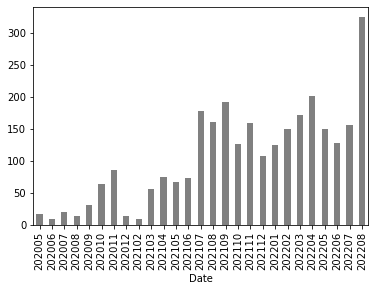

In [13]:
# O volume no tempo, para categoria POLÍTICA
df_politica = df_twitter[df_twitter['Categoria_Predominante']=='POLITICA']
df_politica.groupby(by= ['Date'])['User'].count().plot.bar(color=['grey'])

<AxesSubplot:xlabel='Date'>

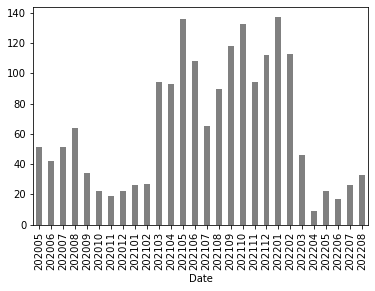

In [14]:
# O volume no tempo, para categoria SAÚDE
df_saude = df_twitter[df_twitter['Categoria_Predominante']=='SAUDE']
df_saude.groupby(by= ['Date'])['User'].count().plot.bar(color=['grey'])